In [2]:
from matplotlib import pyplot as plt
import json
from typing import List

In [8]:
hists = []
with open("../src/checkpoints/pspnet_Epochs:5_lf:DiceLoss_lr:0.0002_trainhist.json", "r") as f:
    hists.append(json.load(f))
with open("../src/checkpoints/unet_Epochs:5_lf:DiceLoss_lr:0.0002_trainhist.json", "r") as f:
    hists.append(json.load(f))
with open("../src/checkpoints/fpn_Epochs:5_lf:DiceLoss_lr:0.0002_trainhist.json", "r") as f:
    hists.append(json.load(f))

In [38]:
def smooth_list(input_list, window_size):
    return [
        sum(input_list[max(0, i - window_size + 1) : i + 1]) / 
        (min(i + 1, window_size))
        for i in range(len(input_list))
    ]

def plot_step_losses_train(hists: List[dict], save: bool = False, smoothing: int = 25):
    fig = plt.figure(figsize=(10, 7))
    models = []
    min_len = 1e10
    for history in hists:
        min_len = min(min_len, len(history["tl"]))
    if smoothing > 0:
        for history in hists:
            plt.plot(smooth_list(history["tl"], smoothing)[:min_len], "-",label=history["model_name"])
            models.append(history["model_name"])
    else:
        for history in hists:
            plt.plot(history["tl"][:min_len], "-",label=history["model_name"])
            models.append(history["model_name"])
    plt.xlabel("Steps")
    plt.ylabel("Train Loss")
    plt.legend(models)
    plt.title("Train Loss(steps)")
    plt.grid()
    if save:
        plt.savefig("../results/collected/train_loss_steps.png")
    return fig

def plot_epoch_losses_train(hists: List[dict], save: bool = False):
    fig = plt.figure(figsize=(10, 7))
    models = []
    for history in hists:
        plt.plot(history["train_loss"], "o--",label=history["model_name"])
        models.append(history["model_name"])
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.legend(models)
    plt.title("Train Loss (epochs)")
    plt.grid()
    if save:
        plt.savefig("../results/collected/train_loss_epochs.png")
    return fig

def plot_step_iou_val(hists: List[dict], save: bool = False, smoothing: int = 25):
    fig = plt.figure(figsize=(10, 7))
    models = []
    min_len = 1e10
    for history in hists:
        min_len = min(min_len, len(history["viou"]))
    if smoothing > 0:
        for history in hists:
            plt.plot(smooth_list(history["viou"], smoothing)[:min_len], "-",label=history["model_name"])
            models.append(history["model_name"])
    else:
        for history in hists:
            plt.plot(history["viou"][:min_len], "-",label=history["model_name"])
            models.append(history["model_name"])
    plt.xlabel("Steps")
    plt.ylabel("Validation IoU")
    plt.legend(models)
    plt.title("Validation IoU (steps)")
    plt.grid()
    if save:
        plt.savefig("../results/collected/val_iou_steps.png")
    return fig

def plot_epoch_iou_val(hists: List[dict], save: bool = False):
    fig = plt.figure(figsize=(10, 7))
    models = []
    for history in hists:
        plt.plot(history["val_meanIoU"], "o--",label=history["model_name"])
        models.append(history["model_name"])
    plt.xlabel("Epochs")
    plt.ylabel("Validation Mean IoU")
    plt.legend(models)
    plt.title("Validation Mean IoU (epochs)")
    plt.grid()
    if save:
        plt.savefig("../results/collected/val_iou_epochs.png")
    return fig

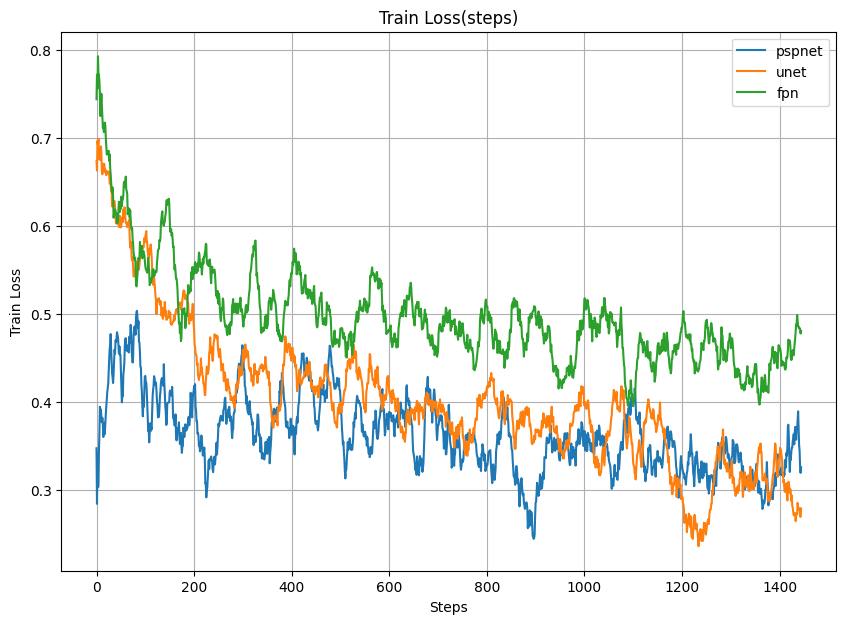

In [39]:
plot_step_losses_train(hists, save=True);

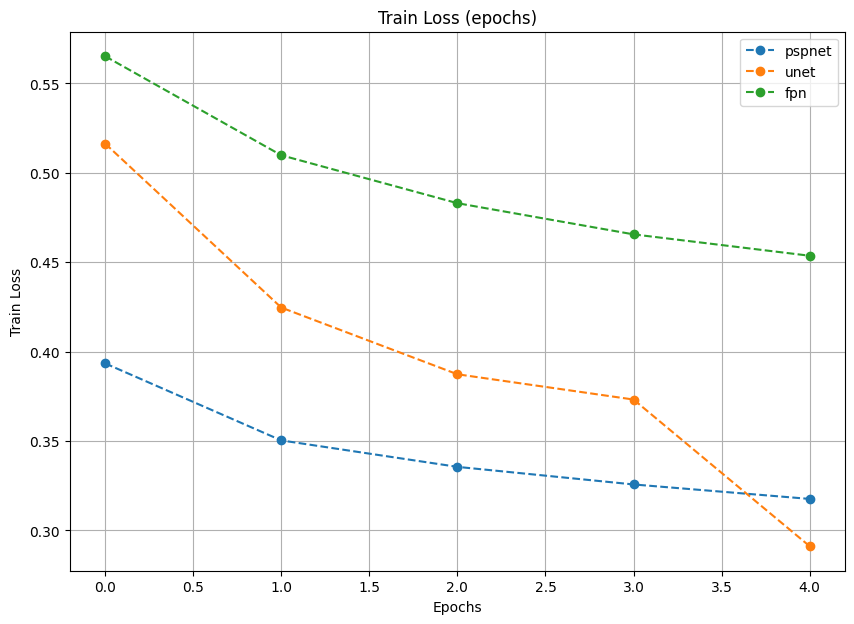

In [40]:
plot_epoch_losses_train(hists, save=True);

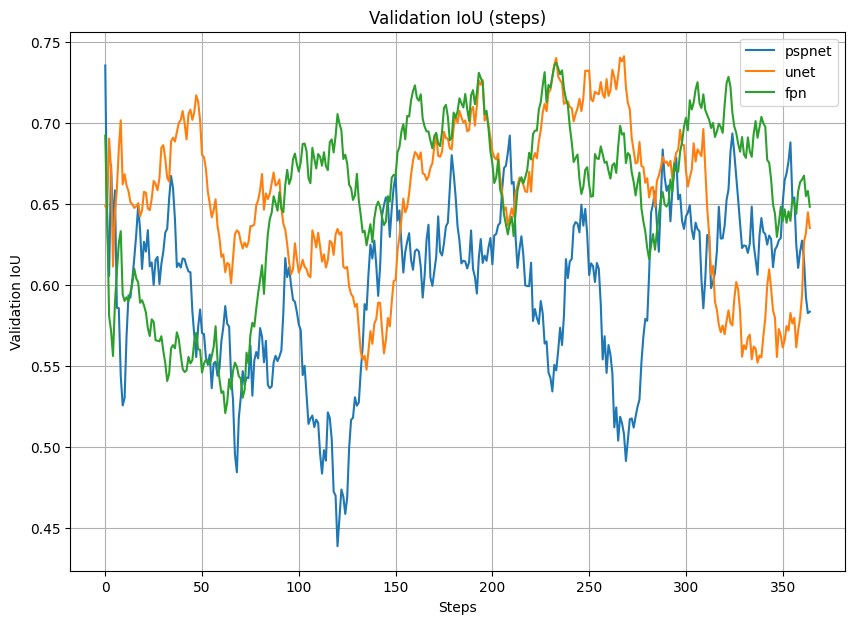

In [41]:
plot_step_iou_val(hists, save=True);

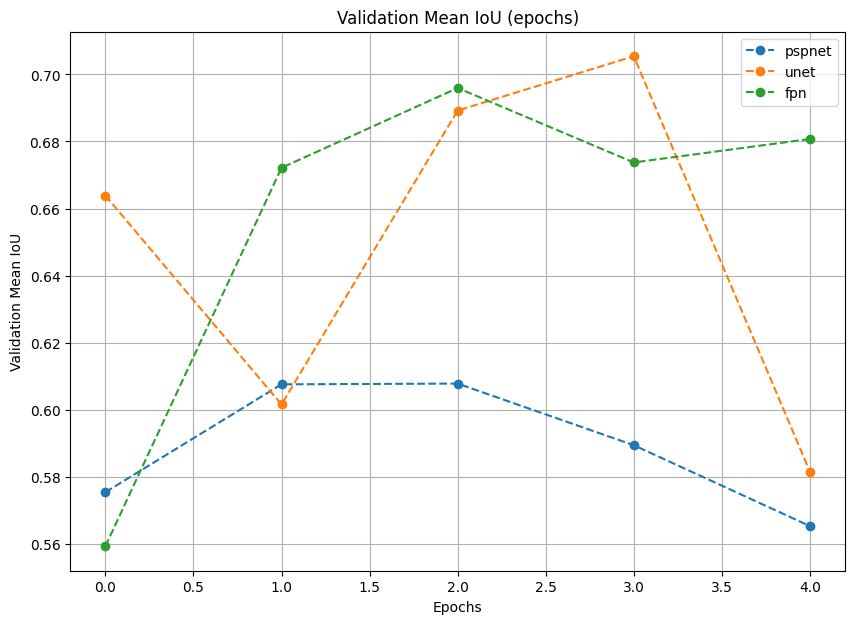

In [42]:
plot_epoch_iou_val(hists, save=True);